<a href="https://colab.research.google.com/github/Seeethy/Markowitz-portfolio-model-/blob/main/Kopia_notatnika_Markowitz_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
import pandas_datareader.data as web
from datetime import date
import datetime
from dateutil.relativedelta import relativedelta
import itertools
import matplotlib.pyplot as plt
import pylab as plot
import numpy as np
import pandas as pd
import plotly.express as px 

In [234]:
companies = []
how_many = int(input("How many companies would you like to have in your portfolio?: "))
for c in range(how_many):
  company = input("Type the shortname of the company (it must be searchable in yahoo finance):  ")
  companies.append(company)

companies

How many companies would you like to have in your portfolio?: 3
Type the shortname of the company (it must be searchable in yahoo finance):  BABA
Type the shortname of the company (it must be searchable in yahoo finance):  EBAY
Type the shortname of the company (it must be searchable in yahoo finance):  FB


['BABA', 'EBAY', 'FB']

In [235]:

today = date.today()
end_date = today.strftime("%Y-%m-%d")
two_years_from_today = date.today() - relativedelta(years=5)
start_date = two_years_from_today.strftime("%Y-%m-%d")
data_source= 'yahoo'

start_date = "2016-11-01"
end_date = "2020-09-01"

data_list = []
for i in range(len(companies)):
  data = web.DataReader(companies[i], data_source, start_date, end_date)
  data_list.append(data)

data = web.DataReader(companies, data_source, start_date, end_date)
adj_close = data["Adj Close"]
index = adj_close.index
dataa['High']

Symbols,BABA,EBAY
Date,,
2016-11-01,101.239998,28.700001
2016-11-02,104.099998,28.510000
2016-11-03,99.300003,28.450001
2016-11-04,98.790001,28.290001
2016-11-07,100.620003,28.370001
...,...,...
2020-08-26,292.480011,58.660000
2020-08-27,290.250000,58.919998
2020-08-28,289.500000,56.259998


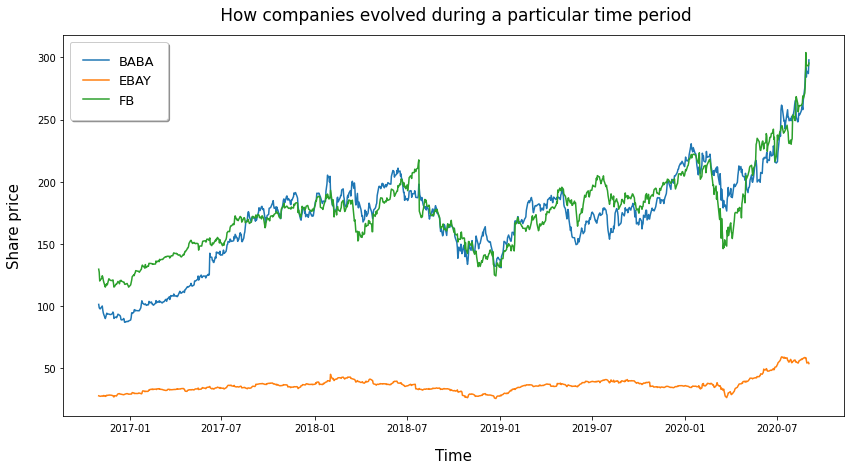

In [236]:

params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, adj_close)
plt.title(" How companies evolved during a particular time period",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Share price",fontsize=15,labelpad=15)
plt.legend(companies, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()

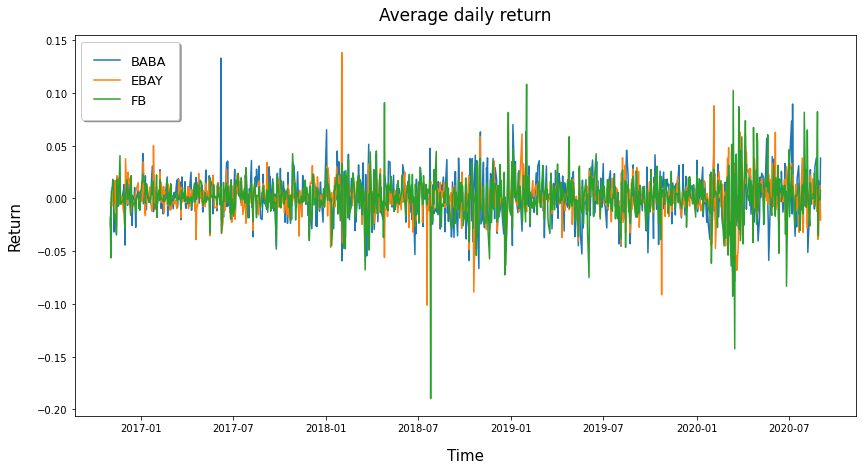

In [289]:
params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, adj_close.pct_change())
plt.title("Average daily return",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Return",fontsize=15,labelpad=15)
plt.legend(companies, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()


In [237]:
#np.log(average daily return)
log_returns = np.log(adj_close/adj_close.shift(1))
log_returns

Symbols,BABA,EBAY,FB
Date,,,
2016-11-01,NaN,NaN,NaN
2016-11-02,-0.026446,-0.004237,-0.018156
2016-11-03,-0.007745,-0.007102,-0.058033
2016-11-04,-0.001843,-0.003928,0.006231
2016-11-07,0.018079,0.010322,0.011528
...,...,...,...
2020-08-26,0.020625,0.009089,0.079018
2020-08-27,-0.027044,-0.039521,-0.035808
2020-08-28,0.016854,-0.036901,0.001499


In [238]:
# mean from average daily returns * trading days per year
log_returns.mean() * 252 

Symbols
BABA    0.282451
EBAY    0.173300
FB      0.215608
dtype: float64

In [239]:
# covariance from average daily returns * trading days per year
log_returns.cov() * 252

Symbols,BABA,EBAY,FB
Symbols,,,
BABA,0.105324,0.033349,0.056576
EBAY,0.033349,0.076332,0.034305
FB,0.056576,0.034305,0.114013


In [240]:
# correlation from average daily returns * trading days per year
log_returns.corr()

Symbols,BABA,EBAY,FB
Symbols,,,
BABA,1.000000,0.371929,0.516285
EBAY,0.371929,1.000000,0.367732
FB,0.516285,0.367732,1.000000


In [276]:
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []

for x in range(10000):
    weights = np.random.random(len(companies))
    weights /= np.sum(weights)

    portfolio_weights.append(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 252)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights))))
                    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

data_transposed = zip(portfolio_weights)
weights_in_dataframe = pd.DataFrame(data_transposed,columns=["Wages"])
weights_in_dataframe.head()


,Wages
0,"[0.23093383404288365, 0.5834872051856349, 0.18..."
1,"[0.113743213442023, 0.36443192992148155, 0.521..."
2,"[0.5643238933344746, 0.32751194052267163, 0.10..."
3,"[0.36812078732906783, 0.34359021127825906, 0.2..."
4,"[0.0915195606901154, 0.2968113868550964, 0.611..."


In [285]:
fig = px.scatter(x = portfolio_volatilities, y = portfolio_returns, width=1200, height=750, hover_data=[weights_in_dataframe],
                 labels={'x': "Expected Volatility", 'y': "Expected Return",'hover_data_0': "Weights"})
fig.update_traces(marker=dict(size = 2))
fig.show()  